# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
dataset=pd.read_csv('Social_Network_Ads.csv')
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,-1].values

# Splitting dataset into Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Training kernel SVM model on Training set

In [5]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

# Making confusion matrix

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred=classifier.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

# k-fold cross-validation

In [7]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(classifier,x_train,y_train,cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


# Applying Grid Search to find best model and best parameters

In [8]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.25,0.50,0.75,1.0],'kernel':['linear']}
            ,{'C':[0.25,0.50,0.75,1.0],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]

grid_search=GridSearchCV(estimator=classifier,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=10,
                        n_jobs=-1)

grid_search.fit(x_train,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 90.67 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


# Visualising Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


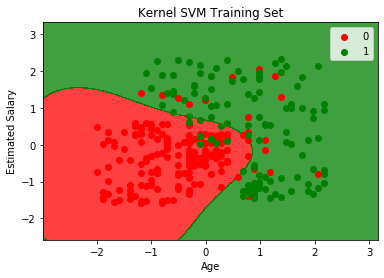

In [9]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Kernel SVM Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


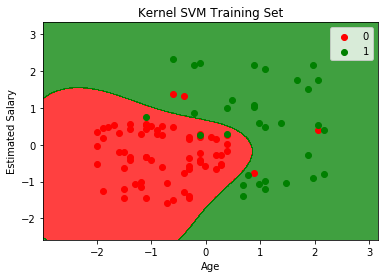

In [10]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01))

plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
    
plt.title('Kernel SVM Training Set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()